## 📝 Project Overview

This project applies **Logistic Regression** to classify whether a tumor is **Malignant (0)** or **Benign (1)** using the Breast Cancer Wisconsin dataset.

You will learn:

- Difference between Regression and Classification
- What Logistic Regression is and when to use it
- How to implement Logistic Regression using Scikit-learn
- How to evaluate a classification model using Accuracy, Confusion Matrix, Classification Report, and ROC Curve


---

## ✅ Difference Between Regression and Classification

---

| Point                  | **Regression**                           | **Classification**                              |
| ---------------------- | ---------------------------------------- | ----------------------------------------------- |
| **Output**             | A continuous number                      | A category or class label                       |
| **Examples**           | Predict house price, salary, temperature | Predict pass/fail, spam/ham, disease/no disease |
| **Algorithm Examples** | Linear Regression                        | Logistic Regression, Decision Tree Classifier   |
| **Goal**               | Estimate *how much*                      | Decide *which category*                         |

**🔍 In short:**

If your target is a **number**, use **Regression.**

If your target is a **label/category**, use **Classification.**

---

## ✅ What is Logistic Regression and When to use it

---

**What is Logistic Regression**

Despite the name, Logistic Regression is a classification algorithm, not a regression one!

**✨ Idea Behind It:**

-Logistic Regression predicts the probability that something belongs to a class.

-It then uses a threshold (usually 0.5) to decide the final class label.

**🧠 How it works:**

Let’s say we want to predict if a student will pass or fail based on study hours.

-Logistic Regression gives us a probability (e.g., 0.83)

-If probability > 0.5 → Predict Pass

-Else → Predict Fail

**📈 It uses a function called the Sigmoid function:**

𝜎(𝑧)=1/(1+𝑒^-𝑧) 

This maps any value of z (like linear output from a model) to a range between 0 and 1, perfect for probabilities.

**When to use it**

Logistic Regression is used when the output (target) is categorical, like:

-Pass / Fail

-Spam / Not Spam

-Churn / No Churn

Unlike Linear Regression (which gives continuous values), Logistic Regression predicts **probabilities** and **converts them into 0 or 1** using a **sigmoid function.**

## 📦 Dataset Used

**Name**: Breast Cancer Wisconsin Dataset  
**Source**: `sklearn.datasets.load_breast_cancer()`  
**Target**:  
- 0 = Malignant  
- 1 = Benign  

This dataset contains **30 numerical features** related to tumor properties like radius, texture, area, smoothness, compactness, etc.


---

## ✅ How to implement Logistic Regression in Python using scikit-learn

---

We'll go with a real-world dataset — specifically, the Breast Cancer dataset from sklearn.datasets.

This is one of the most common and beginner-friendly binary classification datasets.

**📊 What’s in the Dataset?**
    
Objective: Predict whether a tumor is malignant (cancerous) or benign (non-cancerous)

Features: Real-valued medical data like:

-mean radius

-mean texture

-mean area

-etc.

Target:

-0 → malignant

-1 → benign


**Import Libraries & Load Dataset**

In [41]:
# Import essential libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer # load_breast_cancer: loads the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # LogisticRegression: model we'll train
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
# confusion_matrix, accuracy_score, classification_report: for evaluation

## 📌 Steps Performed

1. Imported libraries and loaded dataset
2. Explored the data (columns, shape, summary)
3. Visualized class distribution (Malignant vs Benign)
4. Plotted histograms for feature distributions
5. Plotted boxplots to compare features across classes
6. Created a correlation heatmap
7. Trained a Logistic Regression model
8. Made predictions on the test set
9. Evaluated the model using:
   - Accuracy
   - Confusion Matrix
   - Classification Report (Precision, Recall, F1-score)
   - ROC Curve with AUC


**Load and Explore the Dataset (Breast Cancer Dataset)**

In [42]:
# Load the Dataset
cancer = load_breast_cancer()

# Create a Dataframe for easier viewing
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df["target"] = cancer.target # 0 = malignant, 1 = benign

# Show the first 5 rows
df.head()

# load_breast_cancer() → loads the dataset.
# cancer.data → contains the features (like mean radius, mean texture, etc.)
# cancer.target → the target variable (0 = malignant, 1 = benign)
# pd.DataFrame(... → we convert the data to a pandas DataFrame for easier analysis.
# df.head() → previews the data.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 🔍 Data Exploration

Here we explore the shape and structure of the dataset using:

- `df.info()` to understand column data types and nulls
- `df.describe()` to view basic statistics
- Target class distribution (Malignant vs Benign)


**Understand the Data**

We’ll check:

-Column names (features)

-Data shape (how many rows and columns)

-Data types and non-null values

-Class distribution (how many benign vs malignant)

In [43]:
# 1. Check the shape (rows and columns)
print("Shape of Data:", df.shape)

# 2. See Basic info
df.info()

# df.shape → shows how many samples and features (rows, columns).
# df.info() → tells data types and missing values.

Shape of Data: (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  s

In [44]:
# 3. Summery Statistics
df.describe()

# df.describe() → gives statistical summary (mean, std, etc.) for each column.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [45]:
# 4. Check target class distribution
df["target"].value_counts()

# df['target'].value_counts() → shows how many benign (1) and malignant (0) samples we have.

target
1    357
0    212
Name: count, dtype: int64

## 📊 Data Visualization

We visualize the data using:

- Bar plot of target distribution
- Histograms of selected features
- Boxplots to compare features across cancer types
- Correlation heatmap to identify relationships between features

**Visualize the Data**

This step will help you see how features relate to the target (benign/malignant).

*4.1: Plot Class Distribution (Benign vs Malignant)*

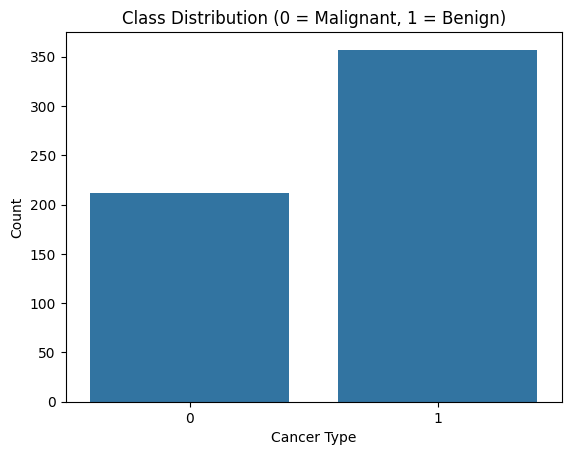

In [46]:
sns.countplot(df, x="target")
plt.title("Class Distribution (0 = Malignant, 1 = Benign)")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.show()

# What this shows:
# Helps check if your data is balanced or imbalanced.
# If one class dominates, the model may overfit to that class.

The bar plot (countplot) clearly shows the class distribution:

Class 0 (Malignant): Fewer cases

Class 1 (Benign): More cases

This tells us:

The dataset is slightly imbalanced, with more benign cases.

It's important to keep this in mind when evaluating model performance — we’ll later see how accuracy can be misleading on imbalanced data.


*4.2: Visualize Feature Distributions using Histograms* 

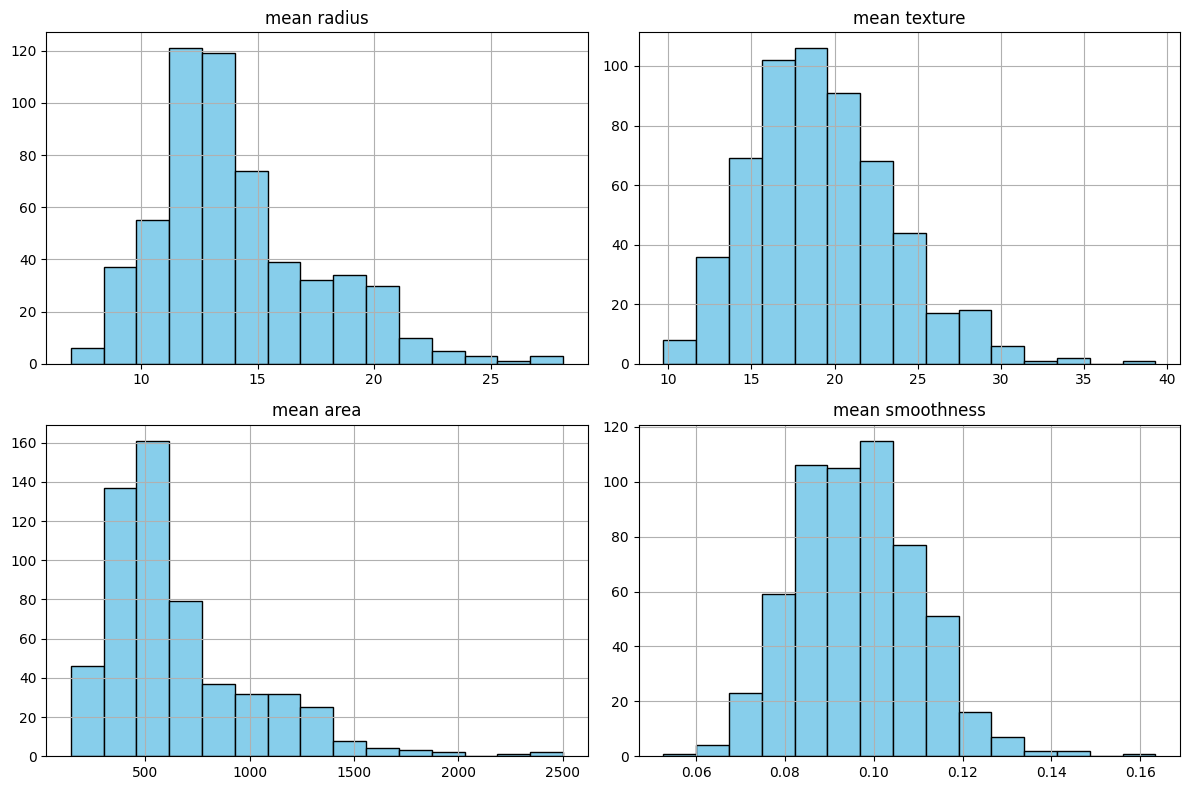

In [47]:
# Select a few important features
features_to_plot = ["mean radius", "mean texture", "mean area", "mean smoothness"]

# Plot histogram for each selected feature
df[features_to_plot].hist(bins=15, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# df[features_to_plot] → We pick only a few features to keep the plot readable.
# .hist(...) → Automatically draws individual histograms for each feature.
# bins=15 → Number of bars (bins) in each histogram.
# figsize=(12, 8) → Controls the size of the plot.
# tight_layout() → Prevents labels from overlapping.

# This helps us:
# Understand the range and shape of each feature.
# Spot outliers or skewed data.
# Decide if scaling or transformation is needed later.

Here’s what you can observe from the plots:

mean radius, mean texture, and mean smoothness look somewhat normally distributed (bell-shaped).

mean area is right-skewed, meaning most values are on the lower side with a few large ones.

This step helps you:

Understand each feature’s range, spread, and skewness.

Decide if feature scaling or transformation is needed later (like standardization or normalization).

*4.3 Use Boxplots to Compare Features Across Classes*

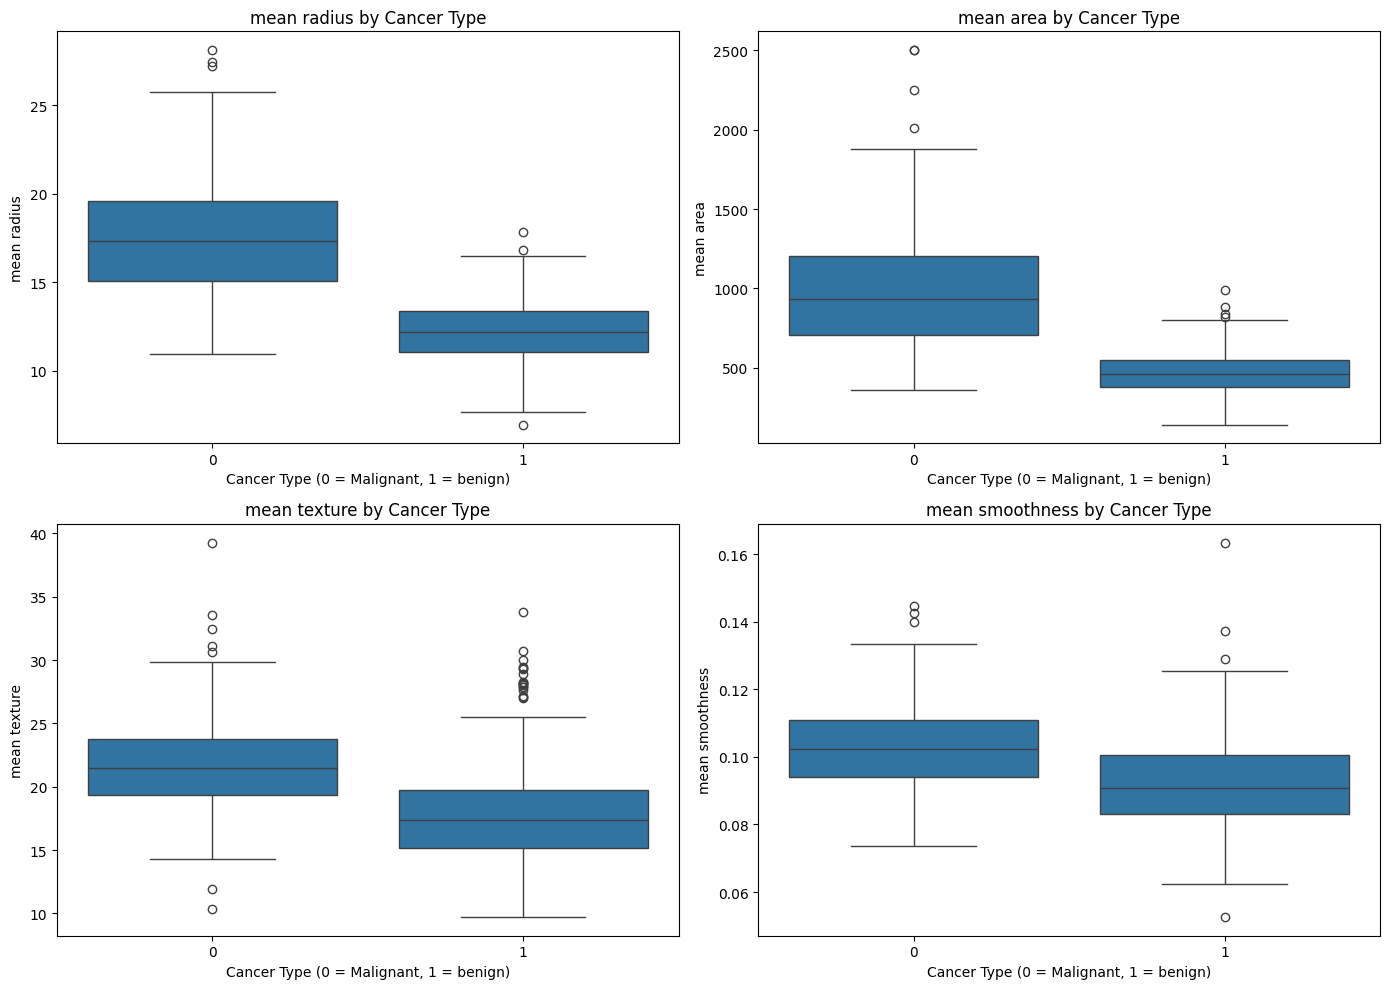

In [48]:
# Select a few features to compare
features_to_plot = ["mean radius", "mean area", "mean texture", "mean smoothness"]

# Loop through features and plot boxplots
plt.figure(figsize=(14,10))
# for next two rows,
#for i, feature in enumerate(features_to_plot,1):
# plt.subplot(n_rows, n_cols, index)

#for i, feature in enumerate(features_to_plot,1):
#This is a for loop using the enumerate() function.
# enumerate() is a built-in Python function used in loops.
# You’re telling Python to:
# Loop through each item in features_to_plot
# Give you two things for each item:
# -i: the index (position in the list)
# -feature: the value at that position
# by default, index starts at 0.
# but we need next line, plt.subplot(n_rows, n_cols, index) this creates the i-th subplot.
# ⚠️ subplot() indexes start at 1, not 0!
# So if you started i from 0, you’d get an error
# So that i = 1, 2, 3, 4 – exactly what plt.subplot() needs and not i = 0,1,2,3, thats why we wrote 1 in "for i, feature in enumerate(features_to_plot,1):".

for i, feature in enumerate(features_to_plot,1):
    plt.subplot(2,2,i) # 2,2 means there should be 2 rows and 2 columns. meaning four different boxes for 4 different features.
    # This splits the figure into a 2x2 grid and puts the current plot in position i.
    # 1 = top-left
    # 2 = top-right
    # 3 = bottom-left
    # 4 = bottom-right
    sns.boxplot(df, x="target", y=feature)#x='target': The cancer type (0 or 1) and y=feature: One of the features like mean radius, etc.
    plt.title(f"{feature} by Cancer Type")
    plt.xlabel("Cancer Type (0 = Malignant, 1 = benign)")
    plt.tight_layout()

plt.show()

🔍 Analysis of the Boxplots:

Each boxplot shows the distribution of a feature across the two cancer types:

0 = Malignant

1 = Benign

🟦 1. mean radius

Malignant tumors tend to have a higher radius on average.

The spread (IQR) is also wider in malignant cases.

✅ So, mean radius is a good differentiator.

🟦 2. mean area

Similar to radius, malignant tumors have much larger areas.

There are a few outliers in both classes, but the central tendency differs significantly.

✅ Another strong distinguishing feature.

🟦 3. mean texture

The difference exists but is less distinct.

There’s a big overlap between the two classes.

⚠️ Might be a weaker predictor alone.

🟦 4. mean smoothness

Both classes have very similar median smoothness.

The overlap is quite high.

❌ Not a strong indicator on its own.

✅ What Learned:
    
Features like mean radius and mean area may have better predictive power.

Boxplots helped you compare how feature values differ between classes.

*4.4Plot Correlation Heatmap*

This will help us:

See how strongly features are related to each other.

Identify highly correlated features (which may cause redundancy in models).

Optionally help with feature selection.

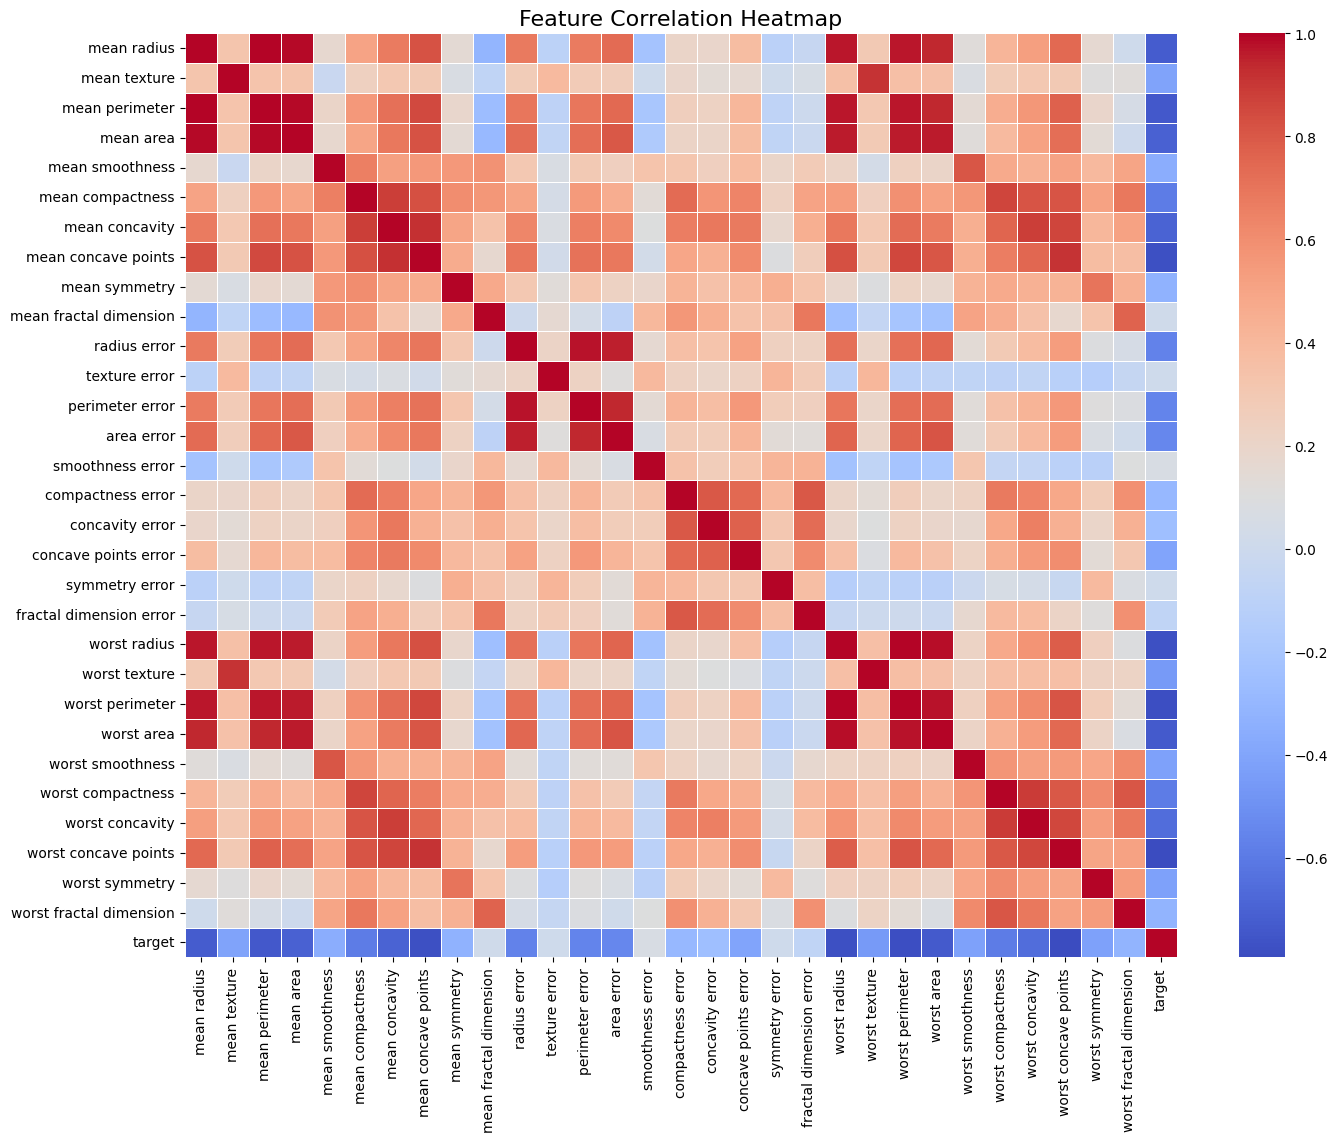

In [49]:
#Calculate correlation matrix
corr_matrix = df.corr()
# This calculates pairwise correlation between all numeric columns.
# df.corr() returns a square matrix of shape (n_features, n_features)
# Values range from -1 to 1.

#Plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidth=0.5)
# This is the main heatmap function.
# corr_matrix: data you want to plot
# cmap='coolwarm': blue for negative, red for positive
# annot=False: disables number annotations (set True to show correlation values)
# linewidths=0.5: draws lines between boxes for clarity

#Add a title
plt.title("Feature Correlation Heatmap", fontsize=16)

plt.show()

✅ How to Read the Heatmap:

Colors:

🔴 Dark red = Strong positive correlation (+1)

🔵 Dark blue = Strong negative correlation (–1)

⚪️ White = No correlation (0)

Diagonal is always 1:

Because every feature is 100% correlated with itself.

🔍 Insights From Your Plot:

✅ Strong Positive Correlations:

mean radius, mean perimeter, and mean area are strongly positively correlated.

➤ If one increases, the others likely do too.

worst radius, worst perimeter, worst area = same behavior.

✅ Correlation With target:
    
Look at the last row (or column) titled "target":

Features positively correlated with target = 1 (benign):

These help predict benign tumors.

Features negatively correlated with target:

These help predict malignant tumors.

e.g., mean concavity, mean concave points have strong negative correlation —> more likely in malignant cases.

🎯 Why It’s Useful:
    
Helps identify:

Redundant features (highly correlated)

Best features to pick for prediction

Helps decide if dimensionality reduction (like PCA) or feature selection is needed

**Split the data (Training & Testing Sets)**

✅ Why are we doing this?

We split the dataset so that:

-The model learns from the training set

-Then we test its performance on unseen data (test set)

-This helps check how well the model generalizes

In [50]:
# Separate features (X) and target (y)
x = df.drop("target", axis=1) # x = all columns except 'target'. we are droping target and storing remaining columns(axix=1(this tells: we are performing operation on columns)) in x 
y = df["target"]  # Target = cancer type (0 = malignant, 1 = benign)

# Split the data: 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Explanation of Each Line
# train_test_split: This function splits your data into training and testing sets.
# X = df.drop("target", axis=1): Removes the target column; keeps only features.
# y = df["target"]: Stores the target (0 or 1) in y.
# test_size=0.2: 20% of data goes to testing; 80% for training.
# random_state=42: Ensures the same split every time you run the code.

✅ Now your data is ready for training:

X_train: features to train the model

y_train: target labels for training

X_test: features for testing

y_test: true labels for evaluation

## 🤖 Model Building – Logistic Regression

We split the dataset into training and test sets, then applied Logistic Regression using sklearn.linear_model.LogisticRegression().

Model was trained on the training data using:

model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

**Train the Logistic Regression model**

✅ Why are we doing this?

Now that the data is split, we’ll:

Feed training data to the model

Let it learn the relationship between features and target

This is where model training happens

In [51]:
# Create the model
model = LogisticRegression(max_iter=1000)

# Train (fit) the model using training data
model.fit(x_train, y_train)

# 🔍 Explanation of Each Line
# model = LogisticRegression(max_iter=1000): Creates the model object.
# max_iter=1000: Increases the number of iterations to ensure the model converges (you can lower/raise it if needed).
# model.fit(X_train, y_train): Trains the model using training features and labels.

C:\Users\lucky\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

**Predict the Model**

✅ What We’ll Do:

Predict target values for test data

Evaluate predictions using:

Accuracy

Confusion Matrix

Classification Report (Precision, Recall, F1-score)

In [52]:
# Predict on the test set
y_pred = model.predict(x_test)

---

## ✅ How to evaluate a classification model using Accuracy, Confusion Matrix, Classification Report, and ROC Curve

---

## 📈 Model Evaluation

We evaluated the model using:

- **Accuracy Score**: Measures how many predictions were correct
- **Confusion Matrix**: Shows actual vs predicted labels
- **Classification Report**: Includes Precision, Recall, F1-score
- **ROC Curve with AUC Score**: Measures model’s ability to distinguish between classes

Model Accuracy: **~96%**  
AUC Score: **1.00** (Perfect classification)


In [53]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

# 🔍 Explanation of Each Line
# y_pred = model.predict(x_test): Predicts labels (malignant/benign) on unseen test data.
# accuracy_score(...): Tells how many predictions were correct overall.
# confusion_matrix(...): Shows correct vs. incorrect predictions in a matrix format.
# classification_report(...): Gives detailed metrics:
# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)
# F1-score = Harmonic mean of precision and recall

Accuracy: 0.96

Confusion Matrix:
[[39  4]
 [ 1 70]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



🔍 Evaluation Summary

✅ Accuracy

Accuracy: 0.96

→ Your model predicted correctly 96% of the test cases — excellent for a basic model!

✅ Confusion Matrix

[[39  4]

 [ 1 70]]

This means:

39 true negatives (Malignant correctly predicted as Malignant)

70 true positives (Benign correctly predicted as Benign)

4 false positives (Malignant wrongly predicted as Benign)

1 false negative (Benign wrongly predicted as Malignant)

Very few misclassifications — this is a strong result!

✅ Classification Report

| Class         | Precision | Recall | F1-score |
| ------------- | --------- | ------ | -------- |
| 0 (Malignant) | 0.97      | 0.91   | 0.94     |
| 1 (Benign)    | 0.95      | 0.99   | 0.97     |

What this means:

Precision is high → very few false alarms.

Recall is also high → model rarely misses actual cases.

F1-score (balance of precision and recall) is strong for both classes.



*ROC Curve(optional)*

✅ What is a ROC Curve?

ROC (Receiver Operating Characteristic) Curve plots:

True Positive Rate (TPR) vs. False Positive Rate (FPR) at various thresholds.

Helps visualize the trade-off between sensitivity and specificity.

The Area Under Curve (AUC) tells how well your model is performing:

AUC = 1 → perfect model

AUC = 0.5 → random guesses

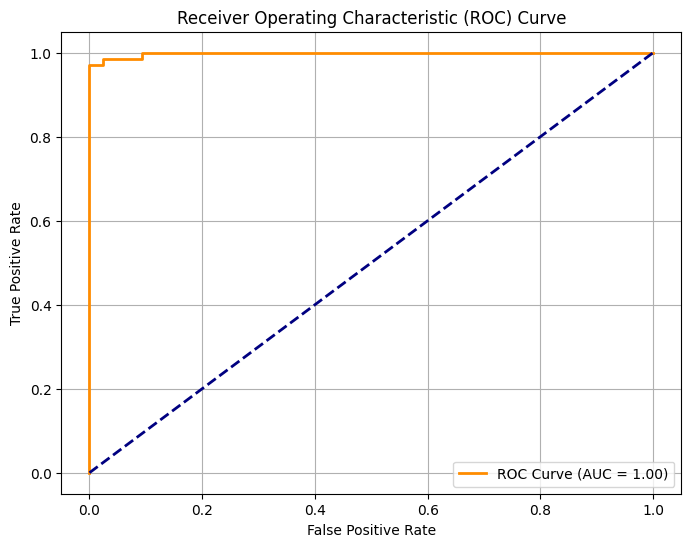

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Predict probabilities
y_prob = model.predict_proba(x_test)[:, 1]  
# predict_proba() returns 2 columns: [P(class=0), P(class=1)]
# We use [:, 1] to get probabilities for class 1 (benign)

# 2. Compute FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 3. Compute AUC Score
roc_auc = roc_auc_score(y_test, y_prob)

# 4. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # reference diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 🧠 Summary of What This Does:
# predict_proba: gives probabilities instead of hard predictions.
# roc_curve: calculates all TPR & FPR values for different thresholds.
# roc_auc_score: computes area under the ROC curve.
# plt.plot(...): shows you how good your model separates the two classes.

That ROC Curve is excellent—since it's hugging the top-left corner and AUC = 1.00, it means the logistic regression model has perfect classification on this test data.

## ✅ Final Notes

- This project demonstrates a complete supervised ML pipeline using Logistic Regression.
- The model showed strong performance with high accuracy and AUC.
- It can be further improved or compared with more complex models like Random Forest, SVM, etc.
